# Лаборатораня работа №2: Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## 1) Обработка пропусков в данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [2]:
data = pd.read_csv('credit_train.csv', encoding='cp1251', sep=';')

In [3]:
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 170746


In [6]:
data.drop(['client_id'], axis=1, inplace=True)

In [7]:
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [8]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка age. Тип данных float64. Количество пустых значений 3, 0.0%.
Колонка credit_sum. Тип данных float64. Количество пустых значений 2, 0.0%.
Колонка score_shk. Тип данных float64. Количество пустых значений 7, 0.0%.
Колонка monthly_income. Тип данных float64. Количество пустых значений 5, 0.0%.
Колонка credit_count. Тип данных float64. Количество пустых значений 9230, 5.41%.
Колонка overdue_credit_count. Тип данных float64. Количество пустых значений 9230, 5.41%.


In [9]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,age,credit_sum,score_shk,monthly_income,credit_count,overdue_credit_count
0,NaN,59998.00,NaN,30000.0,1.0,1.0
1,NaN,10889.00,NaN,NaN,2.0,0.0
2,32.0,10728.00,NaN,NaN,5.0,0.0
3,27.0,12009.09,NaN,NaN,2.0,0.0
4,45.0,NaN,0.421385,NaN,1.0,0.0
...,...,...,...,...,...,...
170741,27.0,64867.00,0.535257,40000.0,6.0,0.0
170742,24.0,17640.00,0.573287,30000.0,1.0,0.0
170743,31.0,27556.47,0.416098,40000.0,1.0,0.0
170744,53.0,6189.00,0.482595,31000.0,2.0,0.0


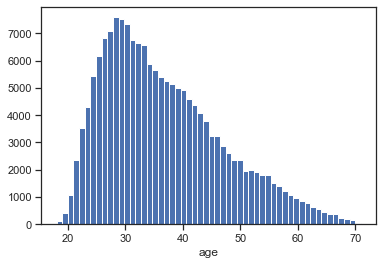

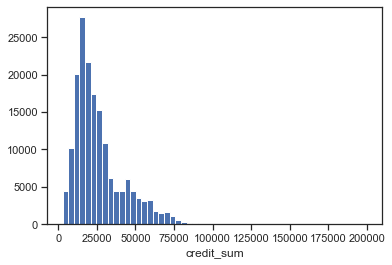

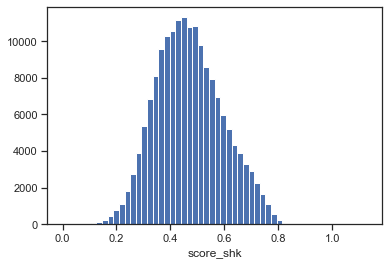

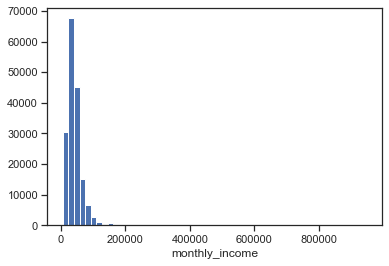

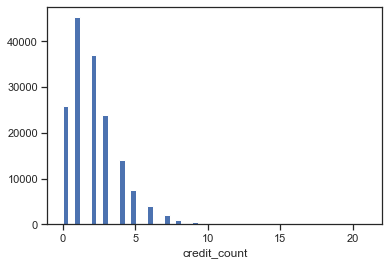

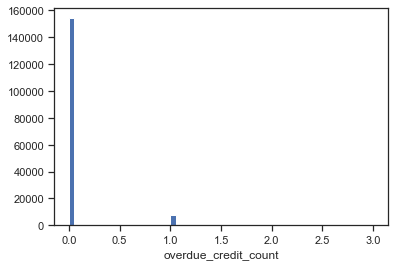

In [10]:
# Гистограмма по признакам
sns.set(style="ticks")
for col in data_num:
    plt.hist(data[col], 54)
    plt.xlabel(col)
    plt.show()

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [12]:
data = data.dropna(subset=['age'], axis=0)
data = data.dropna(subset=['monthly_income'], axis=0)
data = data.dropna(subset=['credit_sum'], axis=0)
data = data.dropna(subset=['score_shk'], axis=0)

In [13]:
data['credit_count'] = SimpleImputer(strategy='median').fit_transform(data['credit_count'].values.reshape(-1, 1))
data['overdue_credit_count'] = SimpleImputer(strategy='median').fit_transform(data['overdue_credit_count'].values.reshape(-1, 1))

In [14]:
data.isnull().sum()

gender                    0
age                       0
marital_status            0
job_position              0
credit_sum                0
credit_month              0
tariff_id                 0
score_shk                 0
education                 2
living_region           192
monthly_income            0
credit_count              0
overdue_credit_count      0
open_account_flg          0
dtype: int64

### Обработка пропусков в категориальных данных

In [15]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка education. Тип данных object. Количество пустых значений 2, 0.0%.
Колонка living_region. Тип данных object. Количество пустых значений 192, 0.11%.


In [16]:
data['education'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(data['education'].values.reshape(-1,1))
data['living_region'] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(data['living_region'].values.reshape(-1,1))

In [17]:
data.isnull().sum()

gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
tariff_id               0
score_shk               0
education               0
living_region           0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
dtype: int64

## 2) Кодирование категориальных признаков

In [18]:
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
7,F,26.0,UNM,SPC,47878.0,10,1.10,0.512525,GRD,МОСКОВСКАЯ ОБЛ,60000.0,3.0,0.0,0
9,F,32.0,UNM,SPC,26268.0,10,1.10,0.465026,GRD,КРАЙ СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0
10,M,26.0,MAR,SPC,16793.0,14,1.00,0.445430,SCH,САНКТ-ПЕТЕРБУРГ,36000.0,2.0,0.0,0
11,F,26.0,UNM,SPC,18936.0,10,1.32,0.455774,SCH,РЕСП. БАШКОРТОСТАН,30000.0,0.0,0.0,0
12,M,37.0,MAR,SPC,42289.0,10,1.60,0.691609,SCH,ОБЛ АРХАНГЕЛЬСКАЯ,70000.0,1.0,0.0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170737 entries, 7 to 170745
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                170737 non-null  object 
 1   age                   170737 non-null  float64
 2   marital_status        170737 non-null  object 
 3   job_position          170737 non-null  object 
 4   credit_sum            170737 non-null  float64
 5   credit_month          170737 non-null  int64  
 6   tariff_id             170737 non-null  float64
 7   score_shk             170737 non-null  float64
 8   education             170737 non-null  object 
 9   living_region         170737 non-null  object 
 10  monthly_income        170737 non-null  float64
 11  credit_count          170737 non-null  float64
 12  overdue_credit_count  170737 non-null  float64
 13  open_account_flg      170737 non-null  int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 19.

In [20]:
category_cols = ['gender', 'marital_status', 'job_position', 'education', 'living_region']

In [21]:
print("Количество уникальных значений\n")
for col in category_cols:
    print(f'{col}: {data[col].unique().size}')

Количество уникальных значений

gender: 2
marital_status: 5
job_position: 18
education: 5
living_region: 301


In [22]:
category_cols.remove('living_region')

In [23]:
for col in category_cols:
    data = pd.concat([data, pd.get_dummies(data[col])], axis=1)

In [24]:
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,SPC,UMN,WOI,WRK,WRP,ACD,GRD,PGR,SCH,UGR
7,F,26.0,UNM,SPC,47878.0,10,1.10,0.512525,GRD,МОСКОВСКАЯ ОБЛ,...,1,0,0,0,0,0,1,0,0,0
9,F,32.0,UNM,SPC,26268.0,10,1.10,0.465026,GRD,КРАЙ СТАВРОПОЛЬСКИЙ,...,1,0,0,0,0,0,1,0,0,0
10,M,26.0,MAR,SPC,16793.0,14,1.00,0.445430,SCH,САНКТ-ПЕТЕРБУРГ,...,1,0,0,0,0,0,0,0,1,0
11,F,26.0,UNM,SPC,18936.0,10,1.32,0.455774,SCH,РЕСП. БАШКОРТОСТАН,...,1,0,0,0,0,0,0,0,1,0
12,M,37.0,MAR,SPC,42289.0,10,1.60,0.691609,SCH,ОБЛ АРХАНГЕЛЬСКАЯ,...,1,0,0,0,0,0,0,0,1,0


## 3) Масштабирование данных

In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### MinMax масштабирование

In [26]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['age']])

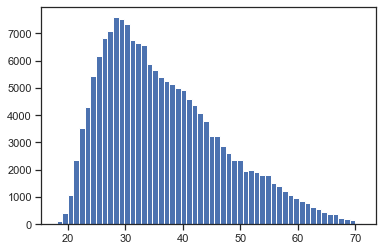

In [27]:
plt.hist(data['age'], 54)
plt.show()

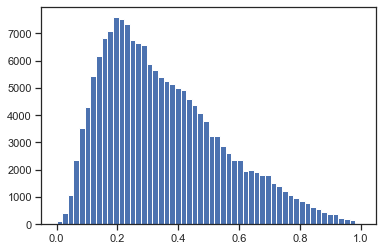

In [28]:
plt.hist(sc1_data, 54)
plt.show()

### Масштабирование данных на основе Z-оценки

In [29]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['credit_count']])

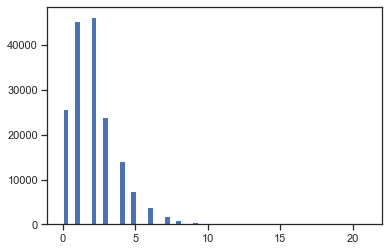

In [30]:
plt.hist(data['credit_count'], 54)
plt.show()

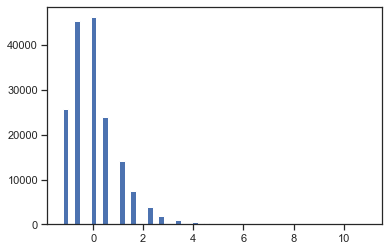

In [31]:
plt.hist(sc2_data, 54)
plt.show()